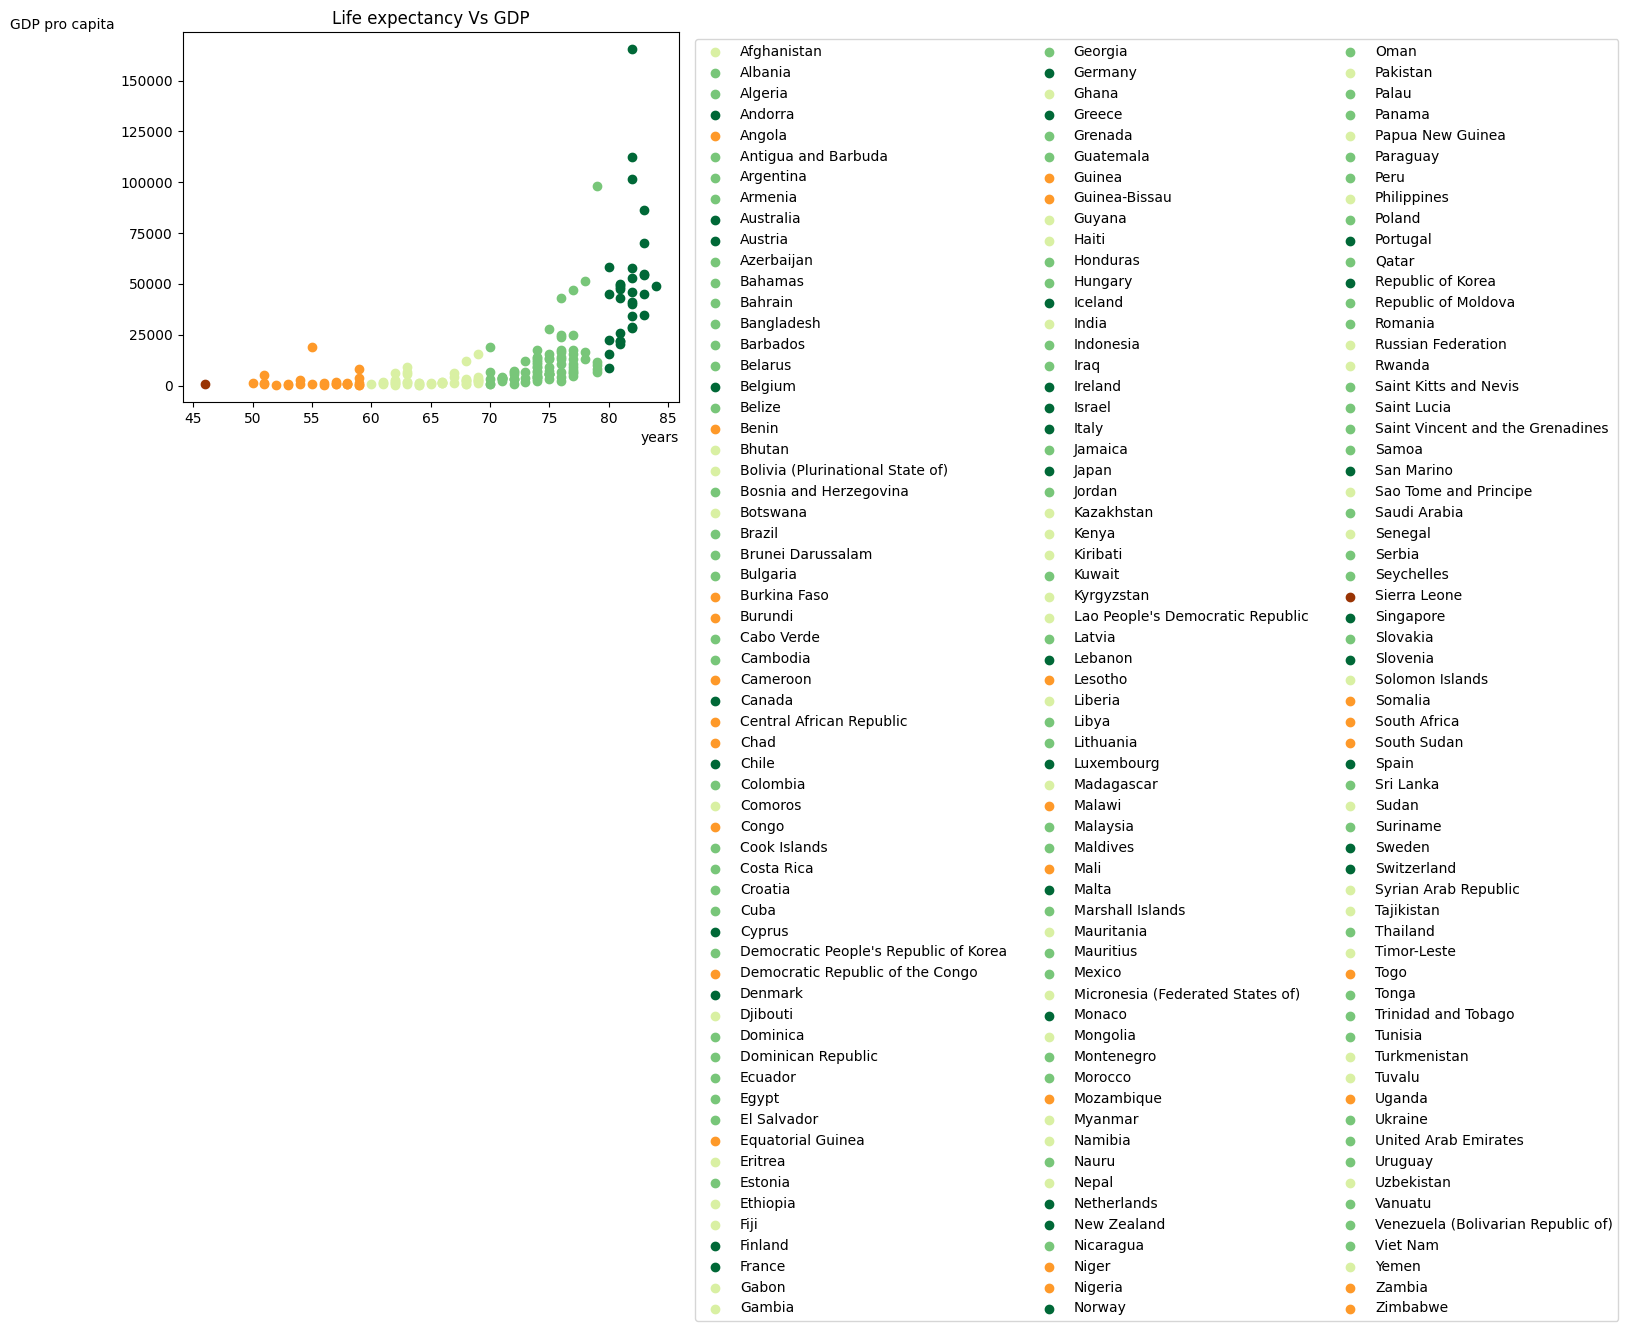

In [10]:
import matplotlib.pyplot as plt

f = open("/workspace/VS/DataSet/Life expectancy at birth.csv", "r")
line = f.readline()
stati = []
while line != "":
    elments = line.split(",")
    if elments[0] not in stati:
        stati.append(elments[0])
    line = f.readline()
f.close()

fGdp = open("/workspace/VS/DataSet/GDP pro capita.csv", "r")
fLe = open("/workspace/VS/DataSet/Life expectancy at birth.csv", "r")
x = []
y = []
lGdp = fGdp.readline()
elemGdp = lGdp.split(",")
lLe = fLe.readline()
elemLe = lLe.split(",")
while lGdp != "" and lLe != "":
    if elemGdp[0] in stati and elemGdp[1] == "2012" :
        while True:
            if elemLe[2] == "Both sexes" and elemLe[0] == elemGdp[0] and elemLe[1] == "2012":
                break
            lLe = fLe.readline()
            elemLe = lLe.split(",")
        # selezione colore e se e quali label mettere a legenda 
        if  int(float(elemLe[3])) < 50:
            plt.scatter(int(float(elemLe[3])), int(float(elemGdp[3])), label = elemGdp[0], color = "#993404")
        elif  50 <= int(float(elemLe[3])) < 60:
            plt.scatter(int(float(elemLe[3])), int(float(elemGdp[3])), label = elemGdp[0], color = "#fe9929")
        elif  60 <= int(float(elemLe[3])) < 70:
            plt.scatter(int(float(elemLe[3])), int(float(elemGdp[3])), label = elemGdp[0], color = "#d9f0a3")
        elif  70 <= int(float(elemLe[3])) < 80:
            plt.scatter(int(float(elemLe[3])), int(float(elemGdp[3])), label = elemGdp[0], color = "#78c679")
        elif  80 <= int(float(elemLe[3])):
            plt.scatter(int(float(elemLe[3])), int(float(elemGdp[3])), label = elemGdp[0], color = "#006837")
        #
        lGdp = fGdp.readline()
        elemGdp = lGdp.split(",")
    else:
        lGdp = fGdp.readline()
        elemGdp = lGdp.split(",")
fGdp.close()
fLe.close()

plt.legend(ncol = 3, bbox_to_anchor=(1.02, 1), loc='upper left')
plt.title("Life expectancy Vs GDP")
plt.xlabel("years", loc='right')
plt.ylabel("GDP pro capita", rotation='horizontal', loc = 'top')
plt.show()